In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
from sklearn.linear_model import LinearRegression

In [2]:
def read_excel_files_in_folder(folder_path):

    files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx') or file.endswith('.xls')]

    data_columns = []
    for file in files:
        file_path = os.path.join(folder_path, file)
        df = pd.read_excel(file_path)
        columns = df.values.T.tolist()
        data_columns.extend(columns)

    return data_columns

folder_path = '/Users/jinhyeon-u/Library/Mobile Documents/com~apple~CloudDocs/Documents iCloud/CNSH/지구/기후 탐구 수행/data/code data'
folder_path_2 = '/Users/jinhyeon-u/Library/Mobile Documents/com~apple~CloudDocs/Documents iCloud/CNSH/지구/기후 탐구 수행/data/지역별 data'

data_columns_list = read_excel_files_in_folder(folder_path)
data_columns_list_2 = read_excel_files_in_folder(folder_path_2)
x = np.array(data_columns_list[0])
Chungnam = np.array((data_columns_list[1]))
Gyeongnam = np.array((data_columns_list[3]))
Global = np.array((data_columns_list[5]))
Gyeongbook = np.array((data_columns_list[7]))
Gyeonggi = np.array((data_columns_list[9]))
Gangwon = np.array((data_columns_list[11]))
Jeonnam = np.array((data_columns_list[13]))
Jeonbuk = np.array((data_columns_list[15]))
nam = np.array(data_columns_list_2[0])          #남부 데이터
dong = np.array(data_columns_list_2[1])         #동부 데이터
su = np.array(data_columns_list_2[2])           #서부 데이터
Han = np.array(data_columns_list_2[3])          #한반도 데이터

Chungnam : y = 0.027387755102040837x -42.679918367346986
Chungnam : 25.789469387755105
Gyeongnam : y = 0.029724489795918397x -45.92014285714291
Gyeongnam : 28.391081632653076
Gyeongbook : y = 0.02608163265306124x -39.46212244897963
Gyeongbook : 25.741959183673472
Gyeonggi : y = 0.0352857142857143x -58.52126530612248
Gyeonggi : 29.69302040816327
Gangwon : y = 0.025357142857142877x -38.926836734693914
Gangwon : 24.466020408163274
Jeonnam : y = 0.02187755102040818x -29.90930612244901
Jeonnam : 24.78457142857144
Jeonbuk : y = 0.02450000000000001x -35.938755102040844
Jeonbuk : 25.311244897959185
Global : y = 0.019289795918367356x -24.06856326530614
Global : 24.15592653061225


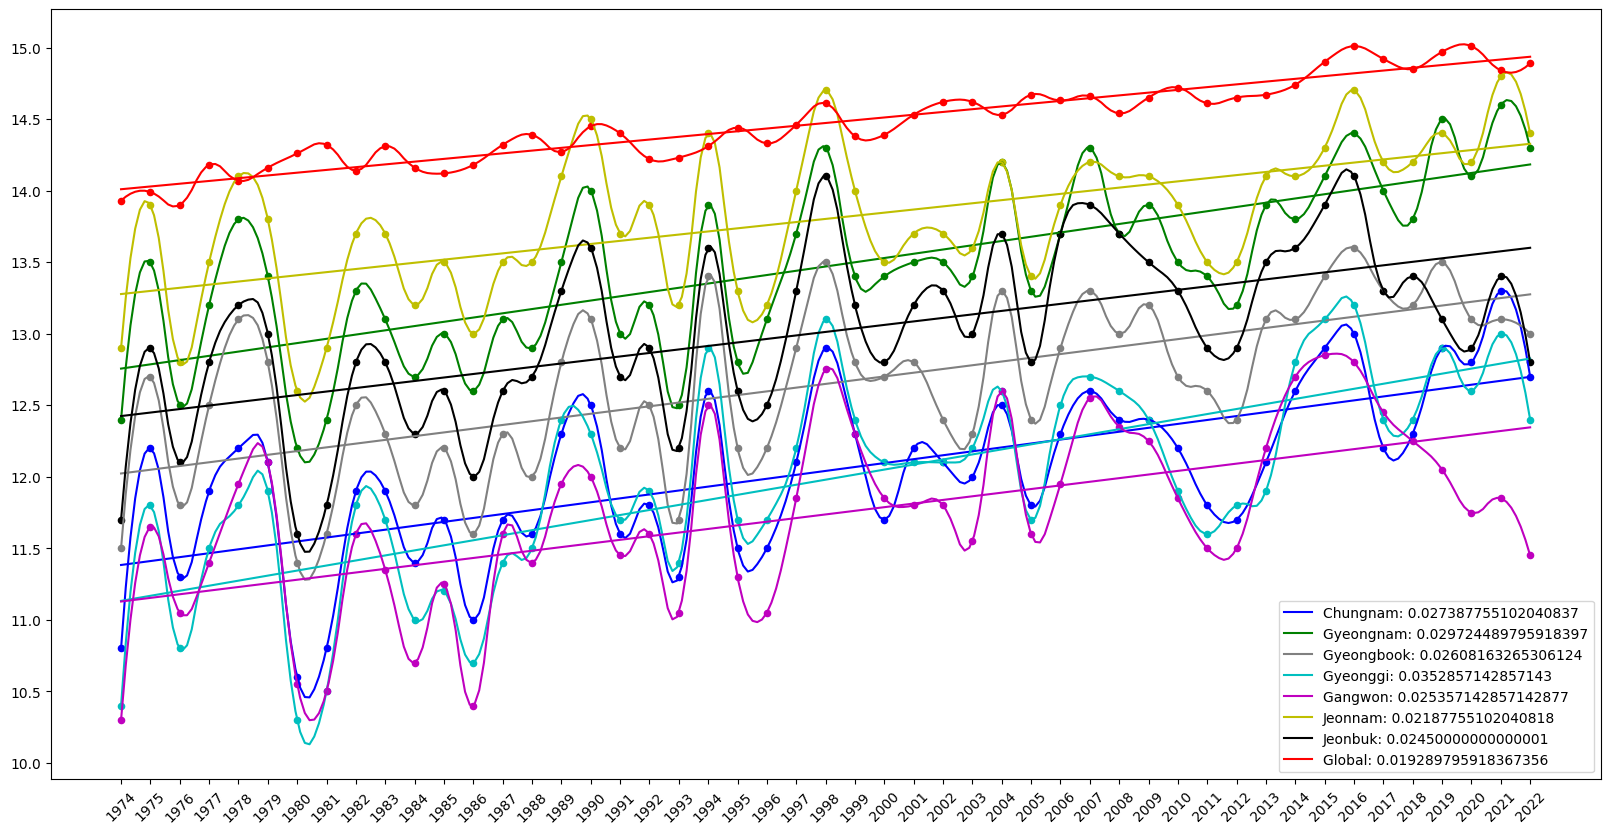

In [14]:
x = x.reshape(-1, 1)
plt.figure(figsize = (20, 10))

def plot_smooth_curve(x_data, y_data, color):
    x_smooth = np.linspace(x_data.min(), x_data.max(), 300)
    spl = make_interp_spline(x_data.flatten(), y_data.flatten(), k=2)
    y_smooth = spl(x_smooth)
    
    plt.plot(x_smooth, y_smooth, color=color)

def linear_regression(a, b, c):
    model = LinearRegression()

    model.fit(x, a)

    y_pred = model.predict(x)

    plt.plot(x, y_pred, label=f"{b}: {model.coef_[0]}", color=c)
    plot_smooth_curve(x, a, color=c)
    plt.scatter(x, a, color=c, s = 20)
    
    print(b, ":", f"y = {model.coef_[0]}x {model.intercept_}")
    print(b,":",2500*model.coef_[0]+model.intercept_)


linear_regression(Chungnam,"Chungnam", "b")
linear_regression(Gyeongnam,"Gyeongnam", "g")
linear_regression(Gyeongbook,"Gyeongbook", "gray")
linear_regression(Gyeonggi,"Gyeonggi", "c")
linear_regression(Gangwon,"Gangwon", "m")
linear_regression(Jeonnam,"Jeonnam", "y")
linear_regression(Jeonbuk,"Jeonbuk", "k")
linear_regression(Global,"Global", "r")

plt.legend()
plt.xticks(np.arange(1974, 2023, step=1), fontsize = 10, rotation = 45)
plt.yticks(np.arange(10, 15.5, step=0.5))
plt.show()


Dong : y = 0.02571938775510205x -39.19447959183675
Dong : 25.103989795918366
Su : y = 0.02905782312925171x -45.71331292517009
Su : 26.93124489795919
Nam : y = 0.02580102040816327x -37.91472448979593
Nam : 26.587826530612247
Han : y = 0.025377551020408194x -38.32679591836741
Han : 25.117081632653075
Global : y = 0.019289795918367356x -24.06856326530614
Global : 24.15592653061225


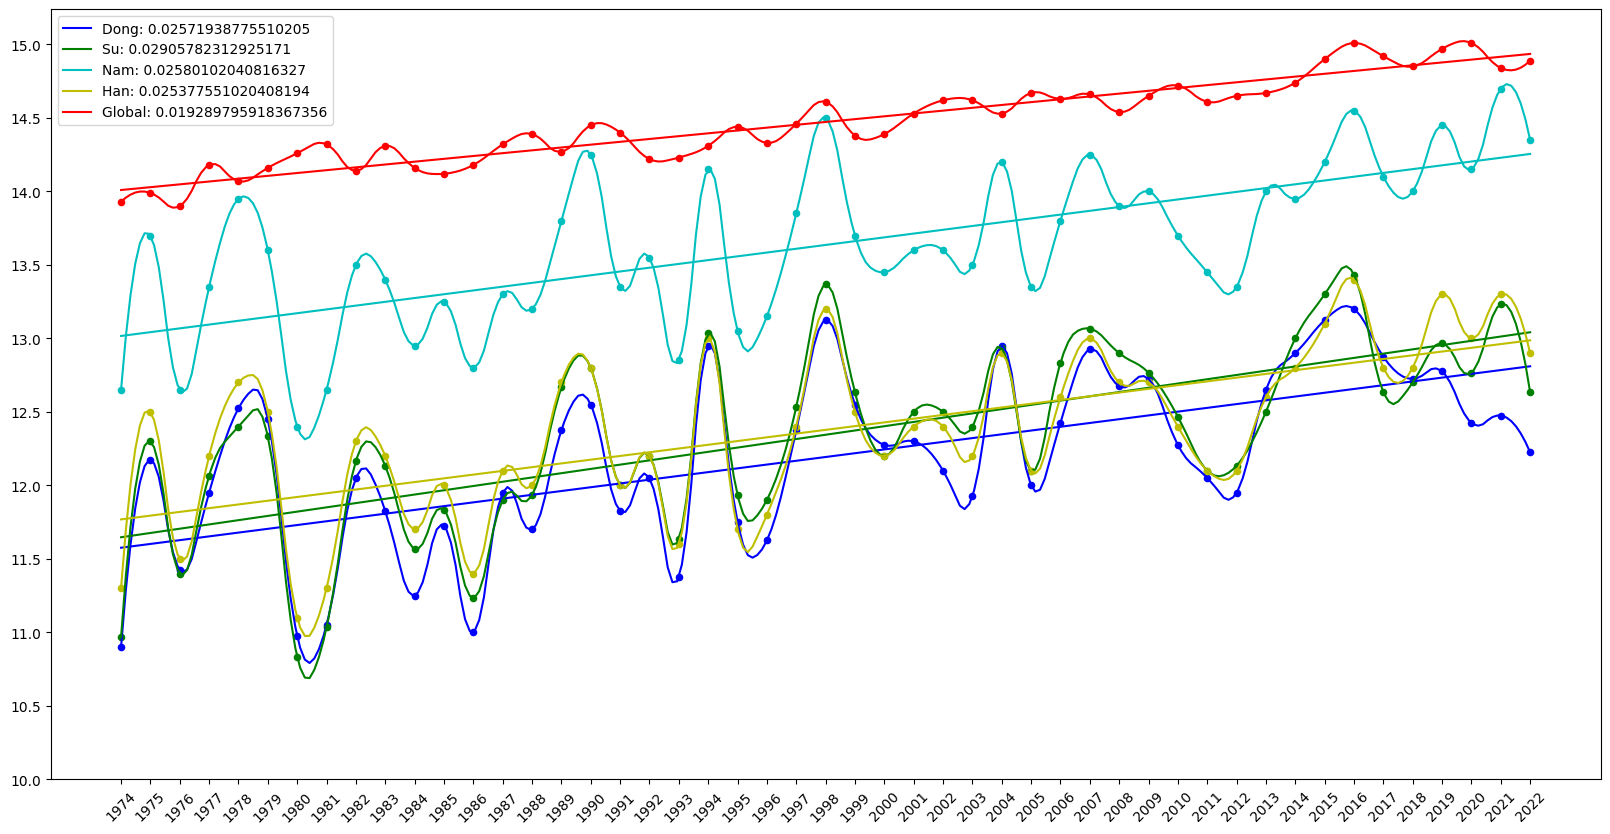

In [15]:
plt.figure(figsize = (20, 10))

linear_regression(dong,"Dong", "b")
linear_regression(su,"Su", "g")
linear_regression(nam,"Nam", "c")
linear_regression(Han,"Han", "y")
linear_regression(Global,"Global", "r")

plt.legend()
plt.xticks(np.arange(1974, 2023, step=1), fontsize = 10, rotation = 45)
plt.yticks(np.arange(10, 15.5, step=0.5))
plt.show()